# Introduction

For this project I would like to know what are the major factors assoociated with predicting an individuals medical insurance costs. Medical insurance is very important for nearly everyone so the purpose of my analying this dataset is to provid people with a better understanding of the costs assocated with medical insurance. Within this project I plan on appling multiple regression analysis to predict the cost of insurance based on demographic and lifestyle attributes such as age, BMI, smoking status, and region. The main goal is to explore how each of these variables impacts insurance charges and to build models that can accurately estimate an individual’s expected medical insurance cost.

# Main Questions 

- What factors in a persons life can influence an individual’s medical insurance cost the most?
- What ethical or social implications can come from predicting insurance costs based on personal data?
- How well can we actually accurately predict a person’s medical insurance cost using regression models?
- what regrssion model would be best for predicting this type of dataset (???)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
table1 = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\insurance.csv")

In [19]:
table1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Pre-processing Data

explain the pre-proccessing 

In [20]:
table1['sex'] = table1['sex'].map({'male': 1, 'female': 0})
table1['smoker'] = table1['smoker'].map({'yes': 1, 'no': 0})

# For 'region', we make new columns for each region
table1 = pd.get_dummies(table1, columns=['region'], drop_first=True)

# Split data into features (X) and target (y)
X = table1.drop('charges', axis=1)  # everything except charges
y = table1['charges']               # this is what we want to predict

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the data (helps models perform better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
table1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# Introducing The Data

Age: 

Sex:

BMI:

Childern: 

Smoker: 

Charges: 

Region_Northwest:

Region_SoutEast: 

Region_SouthWest: 

# Visual 1

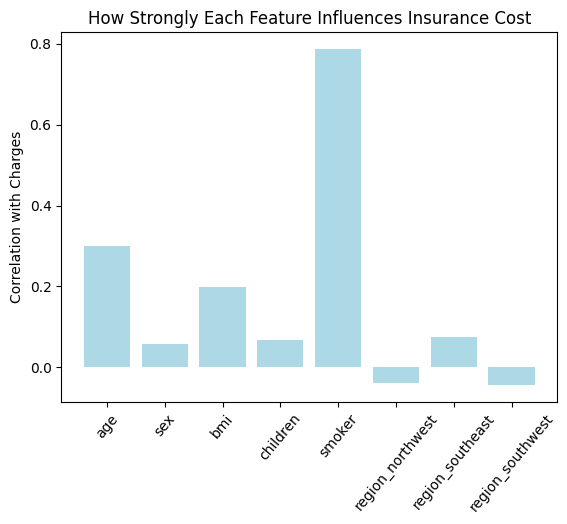

In [ ]:
correlations = table1.corr()['charges'].drop('charges') 

plt.bar(correlations.index, correlations.values, color='lightblue')
plt.title('How Strongly Each Feature Influences Insurance Cost')
plt.ylabel('Correlation with Charges')
plt.xticks(rotation=50)
plt.show()



explain the model
answers What factors in a person’s life can influence medical insurance cost the most?

# Visual 2

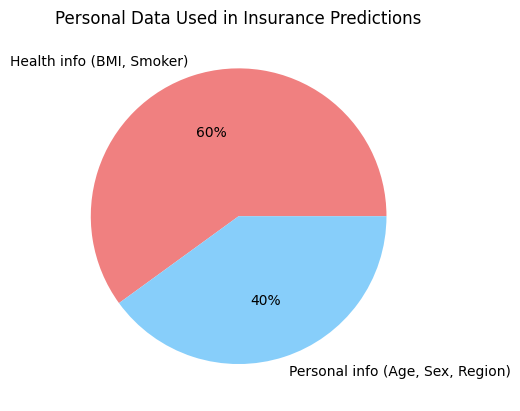

In [ ]:
labels = ['Health info (BMI, Smoker)', 'Personal info (Age, Sex, Region)']
sizes = [60, 40]  
# example percentages ^
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%')
#plt.pie( labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('Personal Data Used in Insurance Predictions')
plt.show()

answers What ethical or social issues can come from predicting insurance costs using personal data?

# Experiment 

In [7]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R-squared score
r2 = r2_score(y_test, y_pred)

# Displaying results
print("Experiment 1: Linear Regression Results")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Check coefficients (might tkae out)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("Feature Coefficients:")
display(coefficients)

Experiment 1: Linear Regression Results
RMSE: 5796.28
R² Score: 0.78
Feature Coefficients:


,Feature,Coefficient
0,age,3614.975415
1,sex,-9.293101
2,bmi,2036.228123
3,children,516.890247
4,smoker,9558.481409
5,region_northwest,-158.140981
6,region_southeast,-290.157047
7,region_southwest,-349.110678
